## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

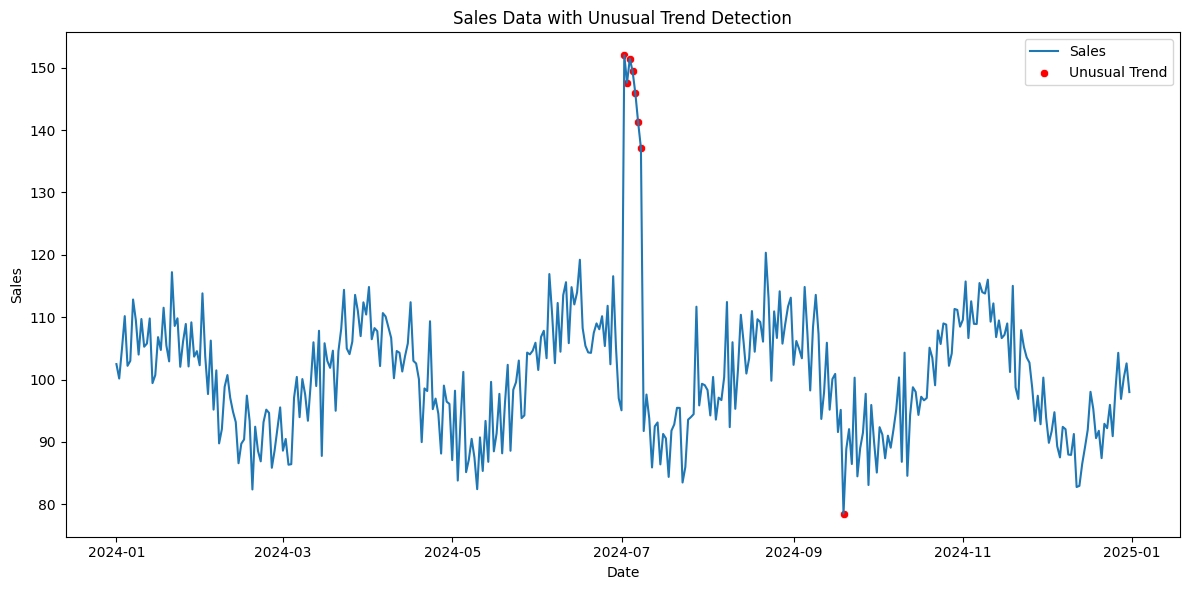


Task 1: Unusual Trend Detection Completed ✅


In [1]:

import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
def train_anomaly_detection_model(sales_data: pd.DataFrame, time_column: str, sales_column: str, contamination: float = 0.05):
    if time_column not in sales_data.columns or sales_column not in sales_data.columns:
        raise ValueError("Time column or sales column not found in DataFrame.")
    sales_data = sales_data.sort_values(by=time_column).reset_index(drop=True)
    scaler = StandardScaler()
    scaled_sales = scaler.fit_transform(sales_data[[sales_column]])
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(scaled_sales)
    return model, scaler
def predict_unusual_trends(sales_data: pd.DataFrame, model: IsolationForest, scaler: StandardScaler, sales_column: str):
    if sales_column not in sales_data.columns:
        raise ValueError("Sales column not found in DataFrame.")
    scaled_sales = scaler.transform(sales_data[[sales_column]])
    outlier_predictions = model.predict(scaled_sales)
    # Isolation Forest returns -1 for outliers and 1 for inliers
    sales_data['is_unusual_trend'] = np.where(outlier_predictions == -1, True, False)
    return sales_data
np.random.seed(42)
dates = pd.to_datetime(pd.date_range(start='2024-01-01', end='2024-12-31', freq='D'))
normal_sales = 100 + 10 * np.sin(np.linspace(0, 10 * np.pi, len(dates))) + np.random.normal(0, 5, len(dates))
unusual_spike_index = len(dates) // 2
normal_sales[unusual_spike_index:unusual_spike_index + 7] += 50  # Simulate a week-long spike
sales_df = pd.DataFrame({'date': dates, 'sales': normal_sales})
anomaly_model, sales_scaler = train_anomaly_detection_model(sales_df.copy(), time_column='date', sales_column='sales', contamination=0.02)
sales_df_with_predictions = predict_unusual_trends(sales_df.copy(), anomaly_model, sales_scaler, sales_column='sales')
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=sales_df_with_predictions, label='Sales')
unusual_trends = sales_df_with_predictions[sales_df_with_predictions['is_unusual_trend']]
sns.scatterplot(x='date', y='sales', data=unusual_trends, color='red', label='Unusual Trend')
plt.title('Sales Data with Unusual Trend Detection')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

print("\nTask 1: Unusual Trend Detection Completed ✅")


**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [2]:
print("\nTask 2: Near Duplicate Detection using Clustering (Implementation in previous response)")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def train_data_validation_model(labeled_data: pd.DataFrame, feature_columns: list, target_column: str):
    if not feature_columns or target_column not in labeled_data.columns or not all(col in labeled_data.columns for col in feature_columns):
        raise ValueError("Feature columns or target column not found in DataFrame.")
    X = labeled_data[feature_columns]
    y = labeled_data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Data Validation Model Accuracy: {accuracy:.4f}")
    return model, feature_columns
def validate_new_data(new_data: pd.DataFrame, model: RandomForestClassifier, feature_columns: list):
    if not all(col in new_data.columns for col in feature_columns):
        raise ValueError("Not all feature columns found in the new data.")
    X_new = new_data[feature_columns]
    predictions = model.predict(X_new)
    new_data['predicted_validity'] = predictions.astype(bool)
    return new_data
np.random.seed(42)
data_labeled = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'error_code': np.random.choice(['A10', 'B25', 'C30', None], size=100),
    'value': np.random.randint(1, 100, size=100),
    'is_valid': [True] * 80 + [False] * 20  # Simulate some invalid records
}
df_labeled = pd.DataFrame(data_labeled)
features = ['feature1', 'feature2', 'value']
target = 'is_valid'
validation_model, model_features = train_data_validation_model(df_labeled.copy(), feature_columns=features, target_column=target)
data_new = {
    'feature1': np.random.rand(20),
    'feature2': np.random.rand(20),
    'error_code': np.random.choice(['A10', 'B25', None, 'D40'], size=20),
    'value': np.random.randint(1, 100, size=20)
}
df_new = pd.DataFrame(data_new)
df_new_validated = validate_new_data(df_new.copy(), validation_model, feature_columns=model_features)
print("\nTask 3: Data Validation using Classification Model")
print(df_new_validated)


Task 2: Near Duplicate Detection using Clustering (Implementation in previous response)
Data Validation Model Accuracy: 0.8000

Task 3: Data Validation using Classification Model
    feature1  feature2 error_code  value  predicted_validity
0   0.428314  0.094157        D40     12                True
1   0.688500  0.311413       None     67                True
2   0.058194  0.979511        B25     65                True
3   0.915214  0.175330        A10     33                True
4   0.442352  0.017161        D40     40                True
5   0.239787  0.763364        D40     74                True
6   0.093873  0.806913        D40     43                True
7   0.182866  0.346304       None     44                True
8   0.934614  0.464674        D40     29                True
9   0.638271  0.649774        D40     13               False
10  0.516696  0.048059        D40     12                True
11  0.657111  0.949146        B25     95                True
12  0.435673  0.886680     

**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def train_data_validation_model(labeled_data: pd.DataFrame, feature_columns: list, target_column: str):
    if not feature_columns or target_column not in labeled_data.columns or not all(col in labeled_data.columns for col in feature_columns):
        raise ValueError("Feature columns or target column not found in DataFrame.")
    X = labeled_data[feature_columns]
    y = labeled_data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Data Validation Model Accuracy: {accuracy:.4f}")
    return model, feature_columns
def validate_new_data(new_data: pd.DataFrame, model: RandomForestClassifier, feature_columns: list):
    if not all(col in new_data.columns for col in feature_columns):
        raise ValueError("Not all feature columns found in the new data.")
    X_new = new_data[feature_columns]
    predictions = model.predict(X_new)
    new_data['predicted_validity'] = predictions.astype(bool)
    return new_data
np.random.seed(42)
data_labeled = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'error_code': np.random.choice(['A10', 'B25', 'C30', None], size=100),
    'value': np.random.randint(1, 100, size=100),
    'is_valid': [True] * 80 + [False] * 20  # Simulate some invalid records
}
df_labeled = pd.DataFrame(data_labeled)
features = ['feature1', 'feature2', 'value']
target = 'is_valid'
validation_model, model_features = train_data_validation_model(df_labeled.copy(), feature_columns=features, target_column=target)
data_new = {
    'feature1': np.random.rand(20),
    'feature2': np.random.rand(20),
    'error_code': np.random.choice(['A10', 'B25', None, 'D40'], size=20),
    'value': np.random.randint(1, 100, size=20)
}
df_new = pd.DataFrame(data_new)
df_new_validated = validate_new_data(df_new.copy(), validation_model, feature_columns=model_features)
print("\nTask 3: Data Validation using Classification Model")
print(df_new_validated)


Data Validation Model Accuracy: 0.8000

Task 3: Data Validation using Classification Model
    feature1  feature2 error_code  value  predicted_validity
0   0.428314  0.094157        D40     12                True
1   0.688500  0.311413       None     67                True
2   0.058194  0.979511        B25     65                True
3   0.915214  0.175330        A10     33                True
4   0.442352  0.017161        D40     40                True
5   0.239787  0.763364        D40     74                True
6   0.093873  0.806913        D40     43                True
7   0.182866  0.346304       None     44                True
8   0.934614  0.464674        D40     29                True
9   0.638271  0.649774        D40     13               False
10  0.516696  0.048059        D40     12                True
11  0.657111  0.949146        B25     95                True
12  0.435673  0.886680       None     46                True
13  0.730039  0.260894        D40      2               